# Only Plotting

In [1]:
import os
import torch

# Import our module containing helper functions
import gravann.polyhedral

# plotting stuff
%matplotlib notebook

# Ensure that changes in imported module (gravann most importantly) are autoreloaded
%load_ext autoreload
%autoreload 2

# If possible enable CUDA
gravann.enableCUDA()
gravann.fixRandomSeeds()
device = os.environ["TORCH_DEVICE"]
print("Will use device ", device)

C:\Users\josch\miniconda3\envs\geodesynet\lib\site-packages\pyvista\themes.py:131: PyVistaDeprecationWarning: use "dark" instead of "night" theme
  warnings.warn('use "dark" instead of "night" theme', PyVistaDeprecationWarning)


Available devices  1
__pyTorch VERSION: 1.13.1
__CUDNN VERSION: 8500
__Number CUDA Devices: 1
Active CUDA Device: GPU 0
Setting default tensor type to Float32
Will use device  cuda:0


We first chose one of the following samples:

    "eros", "bennu", "itokawa", "churyumov-gerasimenko", "planetesimal", "torus", "bennu_nu", "itokawa_nu", "planetesimal_nu"

In [2]:
##################### PLEASE SPECIFY THIS ####################
# one of "eros", "bennu", "itokawa", "churyumov-gerasimenko", "planetesimal", "torus", "bennu_nu", "itokawa_nu", "planetesimal_nu"
SAMPLE_NAME = "churyumov-gerasimenko"
# can be freely chosen
MODEL_NAME = "second"

N_QUADRATUR = 30000

# Plotting
NUMBER_OF_POINTS_FOR_COMPARISON = 1000

# Real Math Stuff
NUMBER_OF_POINTS_FOR_VALIDATION = 10000

BATCH_SIZE = 100
##############################################################

MODEL_FILENAME_MASCON = f"models_polyhedral/{SAMPLE_NAME}_mascon_{MODEL_NAME}.mdl"
MODEL_FILENAME_POLYHEDRAL = f"models_polyhedral/{SAMPLE_NAME}_polyhedral_{MODEL_NAME}.mdl"



# Re-specify the encoding if another encoding was used for training!
encoding = gravann.direct_encoding()

mesh_vertices, mesh_faces = gravann.load_polyhedral_mesh(SAMPLE_NAME)
density = gravann.polyhedral.calculate_density(mesh_vertices, mesh_faces)

# Only for the legacy plots required
mascon_points, mascon_masses = gravann.load_mascon_data(SAMPLE_NAME)

print(f"Chosen body: {SAMPLE_NAME}")
print(f"Loaded Polyhedral Mesh Data:")
print(f"Loaded the Mesh of {SAMPLE_NAME}")
print(f"Number of vertices: {len(mesh_vertices)}")
print(f"Number of faces (triangles): {len(mesh_faces)}")
print(f"Calculated Density: {density}")

Chosen body: churyumov-gerasimenko
Loaded Polyhedral Mesh Data:
Loaded the Mesh of churyumov-gerasimenko
Number of vertices: 9149
Number of faces (triangles): 18294
Calculated Density: 1.6605502606980964


## 0 - Comparing polyhedral model & mascon model
Next, we can plot a comparison between the polyhedral gravity model's labels and the mascon labels:

Discarding 0 of 18294 points in altitude sampler which did not meet requested altitude.
Splitting in left / right hemisphere
Left:  476  points.
Right:  524  points.


<IPython.core.display.Javascript object>


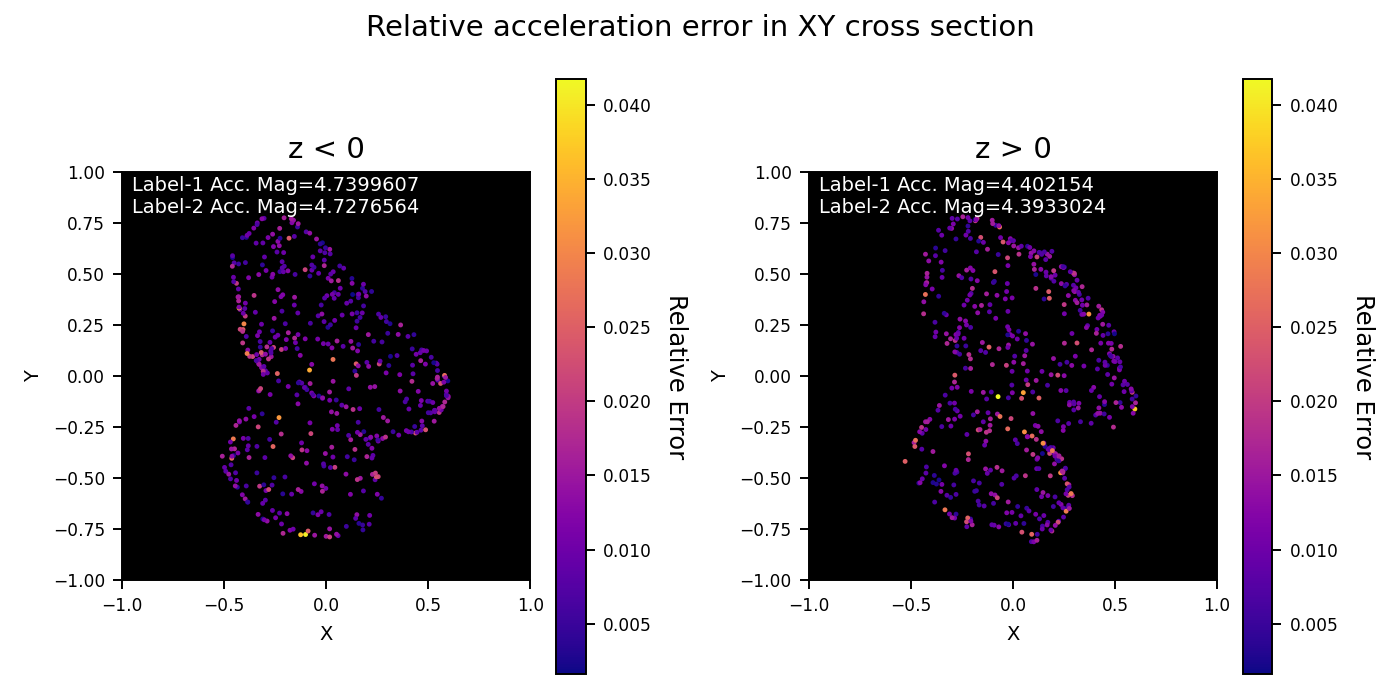

(<AxesSubplot: title={'center': 'z > 0'}, xlabel='X', ylabel='Y'>,
 tensor([[-0.0697,  3.0010, -0.1439],
         [-0.3477, -2.8133, -0.8810],
         [-2.9103, -1.4470, -0.0924],
         ...,
         [-0.0866,  2.3191, -1.9790],
         [-0.6395, -2.9062, -0.3588],
         [-2.8746,  0.2081, -0.8907]]))

In [3]:
gravann.polyhedral.plot_compare_acceleration(SAMPLE_NAME,
                                             compare_mode=('mascon', 'polyhedral'),
                                             plane="XY",
                                             N=NUMBER_OF_POINTS_FOR_COMPARISON,
                                             logscale=False,
                                             altitude=1e-5)

## 1 - Loading the models

C:\Users\josch\miniconda3\envs\geodesynet\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Sampling points...: 1243it [00:00, 2566.36it/s]                                                                        


<IPython.core.display.Javascript object>


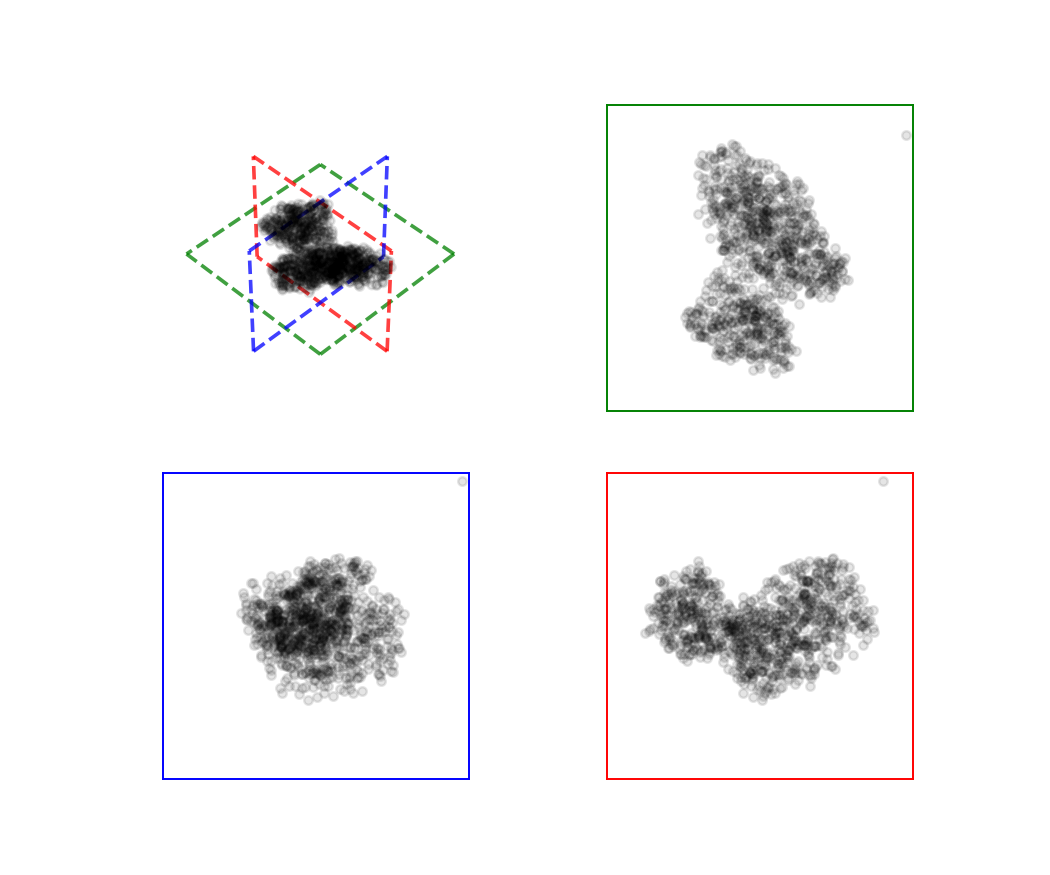

<IPython.core.display.Javascript object>


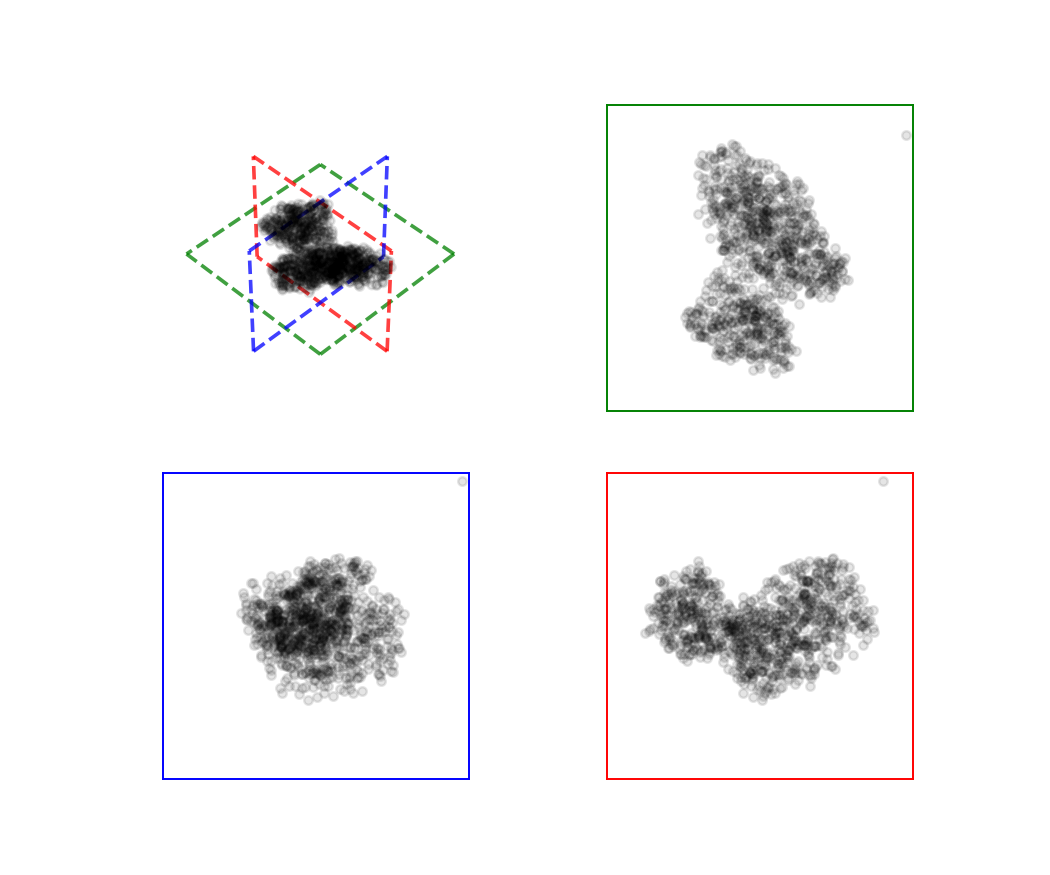

In [4]:
# POLYHEDRAL MODEL
polyhedral_model = gravann.init_network(encoding, n_neurons=100, model_type="siren", activation = gravann.AbsLayer())

polyhedral_model.load_state_dict(torch.load(MODEL_FILENAME_POLYHEDRAL))

polyhedral_c = gravann.compute_c_for_model_v2(polyhedral_model, encoding, 'polyhedral',
                                              mascon_points=mascon_points,
                                              mascon_masses=mascon_masses,
                                              mesh_vertices=mesh_vertices,
                                              mesh_faces=mesh_faces,
                                              density=density,
                                              use_acc = True)
gravann.plot_model_rejection(polyhedral_model, encoding, views_2d=True, bw=True, N=NUMBER_OF_POINTS_FOR_COMPARISON, alpha=0.1, s=50, c=polyhedral_c, crop_p=0.1, progressbar=True)

Sampling points...: 1073it [00:00, 2480.23it/s]                                                                        


<IPython.core.display.Javascript object>


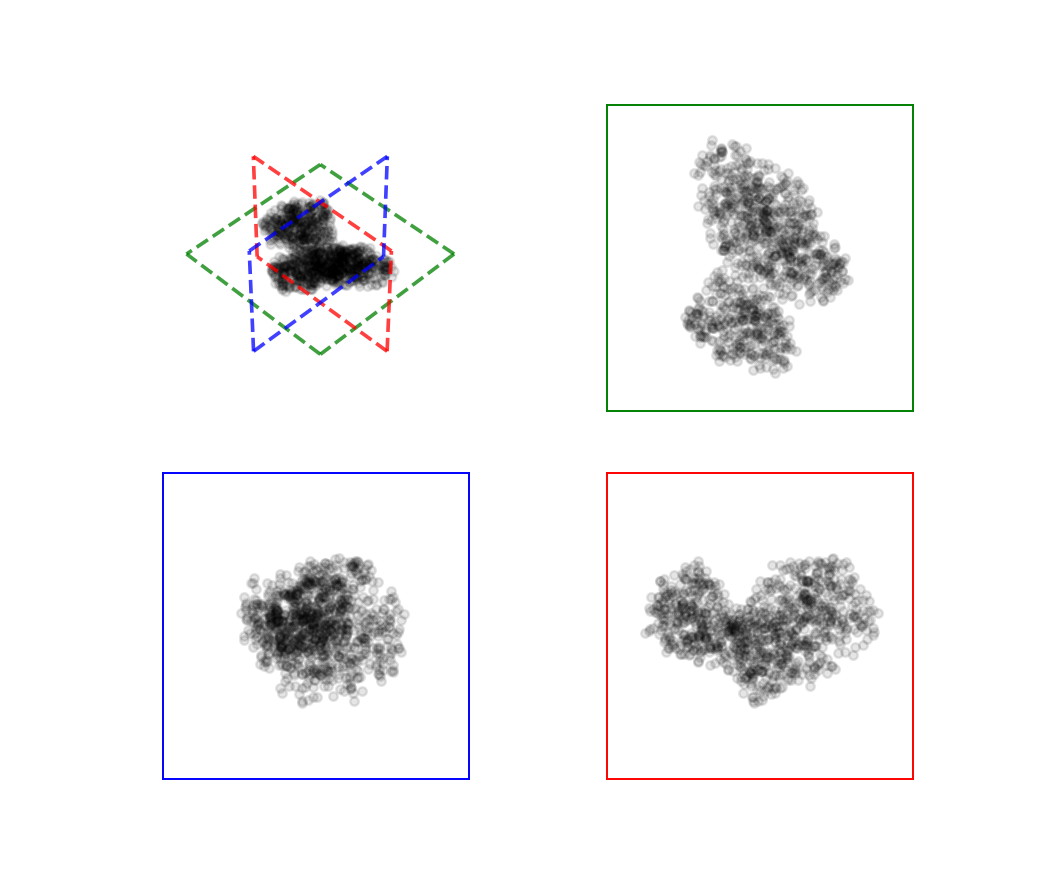

<IPython.core.display.Javascript object>


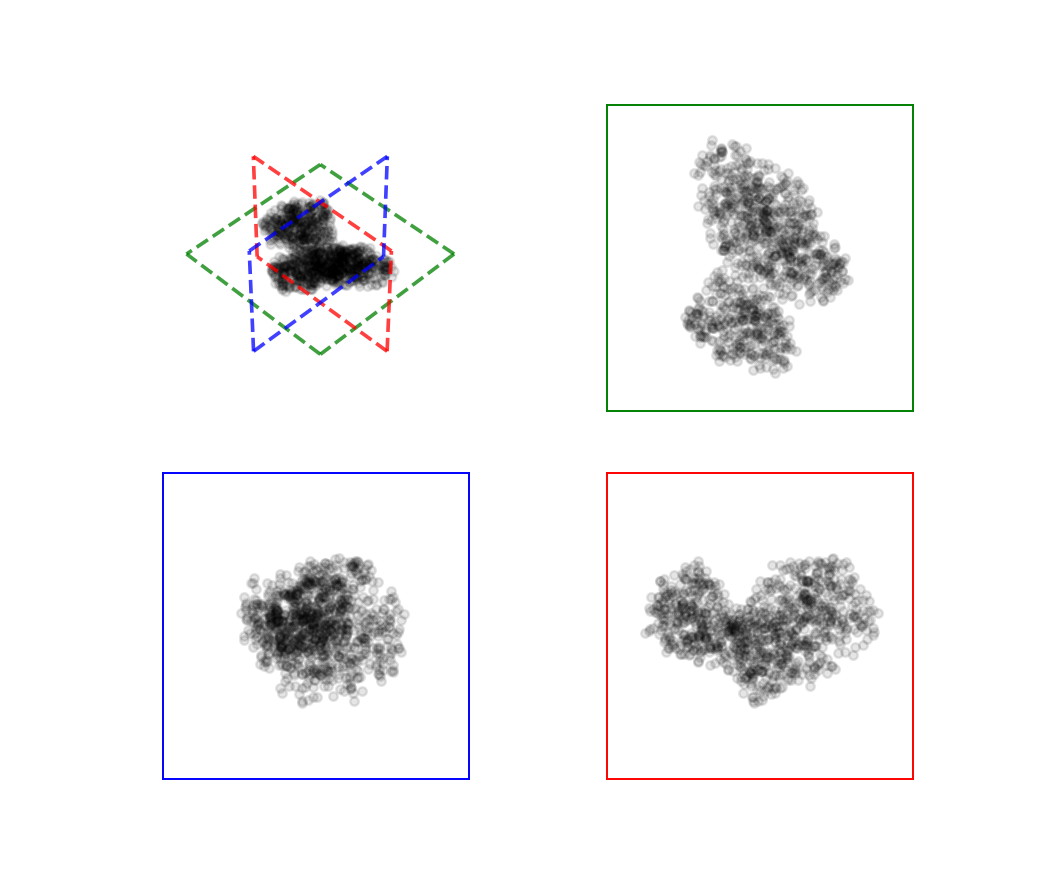

In [5]:
# MASCON MODEL
mascon_model = gravann.init_network(encoding, n_neurons=100, model_type="siren", activation = gravann.AbsLayer())

mascon_model.load_state_dict(torch.load(MODEL_FILENAME_MASCON))

mascon_c = gravann.compute_c_for_model_v2(mascon_model, encoding, 'mascon',
                                          mascon_points=mascon_points,
                                          mascon_masses=mascon_masses,
                                          mesh_vertices=mesh_vertices,
                                          mesh_faces=mesh_faces,
                                          density=density,
                                          use_acc = True)
gravann.plot_model_rejection(mascon_model, encoding, views_2d=True, bw=True, N=NUMBER_OF_POINTS_FOR_COMPARISON, alpha=0.1, s=50, c=mascon_c, crop_p=0.1, progressbar=True)

## 2 - Comparing Polyhedral Model to the Polyhedral Ground Truth

Discarding 0 of 18294 points in altitude sampler which did not meet requested altitude.
Splitting in left / right hemisphere
Left:  452  points.
Right:  548  points.


<IPython.core.display.Javascript object>


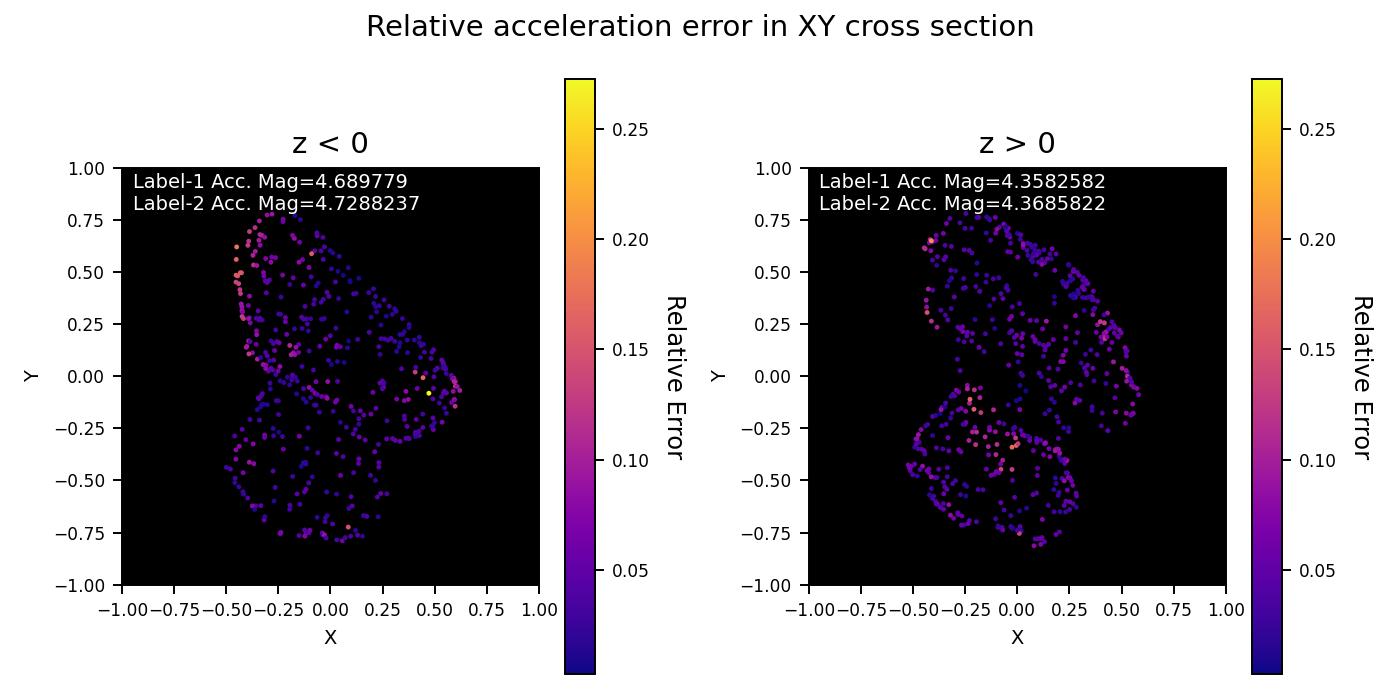

(<AxesSubplot: title={'center': 'z > 0'}, xlabel='X', ylabel='Y'>,
 tensor([[ 0.0145, -0.6539, -2.1581],
         [-0.4990,  2.7412, -0.6705],
         [ 0.8510,  0.8859, -2.5101],
         ...,
         [-0.9549,  1.4402, -2.3269],
         [-2.1079, -1.5378, -1.8358],
         [ 1.3596,  1.7521, -2.1409]]))

In [6]:
gravann.polyhedral.plot_compare_acceleration(SAMPLE_NAME,
                                             compare_mode=('model', 'polyhedral'),
                                             model_1=(polyhedral_model, encoding, polyhedral_c),
                                             plane="XY",
                                             N=NUMBER_OF_POINTS_FOR_COMPARISON,
                                             logscale=False,
                                             altitude=1e-5)

In [7]:
polyhedral_model2polyhedral_gt = gravann.validation_v2(polyhedral_model, encoding, SAMPLE_NAME, 'polyhedral', use_acc=True,
                mesh_vertices=mesh_vertices,
                mesh_faces=mesh_faces,
                N=NUMBER_OF_POINTS_FOR_VALIDATION,
                N_integration=N_QUADRATUR,
                batch_size=BATCH_SIZE,
                progressbar=True)

Computing validation...:  65%|████████████████████████████████▍                 | 55000/84894 [02:26<01:10, 422.24it/s]

Discarding 2987 of 18294 points in altitude sampler which did not meet requested altitude.


Computing validation...:  77%|██████████████████████████████████████▎           | 65000/84894 [03:16<00:59, 332.92it/s]

Discarding 8598 of 18294 points in altitude sampler which did not meet requested altitude.


Computing validation...:  88%|████████████████████████████████████████████▏     | 75000/84894 [04:00<00:28, 343.53it/s]

Discarding 15222 of 18294 points in altitude sampler which did not meet requested altitude.


Computing validation...: 85000it [04:36, 307.46it/s]                                                                   


In [8]:
polyhedral_model2polyhedral_gt

,Altitude,Normalized L1 Loss,Normalized Relative Component Loss,RMSE,relRMSE
0,Low Altitude,0.051786,0.055619,0.361159,0.145542
1,High Altitude,0.024709,0.031588,0.227624,0.107442
2,Altitude_0,0.021185,0.024732,0.079570,0.031296
3,Altitude_1,0.009428,0.012685,0.050875,0.022756
4,Altitude_2,0.004148,0.008617,0.099685,0.084248


## 3 - Comparing Polyhedral Model to the Mascon Ground Truth

In [9]:
polyhedral_model2mascon_gt = gravann.validation_v2(polyhedral_model, encoding, SAMPLE_NAME, 'mascon', use_acc=True,
                mascon_points=mascon_points,
                mascon_masses=mascon_masses,
                N=NUMBER_OF_POINTS_FOR_VALIDATION,
                N_integration=N_QUADRATUR,
                batch_size=BATCH_SIZE,
                progressbar=True)

Computing validation...:  65%|███████████████████████████████▋                 | 55000/84894 [00:53<00:26, 1146.78it/s]

Discarding 2987 of 18294 points in altitude sampler which did not meet requested altitude.


Computing validation...:  77%|██████████████████████████████████████▎           | 65000/84894 [01:26<00:24, 799.26it/s]

Discarding 8598 of 18294 points in altitude sampler which did not meet requested altitude.


Computing validation...:  88%|████████████████████████████████████████████▏     | 75000/84894 [01:52<00:11, 852.64it/s]

Discarding 15222 of 18294 points in altitude sampler which did not meet requested altitude.


Computing validation...: 85000it [02:11, 644.92it/s]                                                                   


In [10]:
polyhedral_model2mascon_gt

,Altitude,Normalized L1 Loss,Normalized Relative Component Loss,RMSE,relRMSE
0,Low Altitude,0.054189,0.058069,0.429405,0.151414
1,High Altitude,0.027136,0.033988,0.330941,0.117708
2,Altitude_0,0.021493,0.025118,0.080786,0.031786
3,Altitude_1,0.009886,0.013287,0.054590,0.024267
4,Altitude_2,0.003451,0.007155,0.071089,0.059930


## 4 - Comparing Mascon Model to the Mascon Ground Truth

In [11]:
mascon_model2mascon_gt = gravann.validation_v2(mascon_model, encoding, SAMPLE_NAME, 'mascon', use_acc=True,
                mascon_points=mascon_points,
                mascon_masses=mascon_masses,
                N=NUMBER_OF_POINTS_FOR_VALIDATION,
                N_integration=N_QUADRATUR,
                batch_size=BATCH_SIZE,
                progressbar=True)

Computing validation...:  65%|███████████████████████████████▋                 | 54900/84894 [00:52<00:28, 1057.96it/s]

Discarding 2987 of 18294 points in altitude sampler which did not meet requested altitude.


Computing validation...:  77%|██████████████████████████████████████▎           | 65000/84894 [01:25<00:28, 698.50it/s]

Discarding 8598 of 18294 points in altitude sampler which did not meet requested altitude.


Computing validation...:  88%|████████████████████████████████████████████▏     | 75000/84894 [01:51<00:11, 824.63it/s]

Discarding 15222 of 18294 points in altitude sampler which did not meet requested altitude.


Computing validation...: 85000it [02:11, 647.27it/s]                                                                   


In [12]:
mascon_model2mascon_gt

,Altitude,Normalized L1 Loss,Normalized Relative Component Loss,RMSE,relRMSE
0,Low Altitude,0.037658,0.039954,0.319795,0.092959
1,High Altitude,0.034105,0.043375,0.552286,0.206787
2,Altitude_0,0.010633,0.012343,0.037594,0.014504
3,Altitude_1,0.004507,0.006002,0.017491,0.007542
4,Altitude_2,0.002402,0.004876,0.009266,0.006335


## 5 - Comparing Mascon Model to the Polyhedral Ground Truth

Discarding 0 of 18294 points in altitude sampler which did not meet requested altitude.
Splitting in left / right hemisphere
Left:  478  points.
Right:  522  points.


<IPython.core.display.Javascript object>


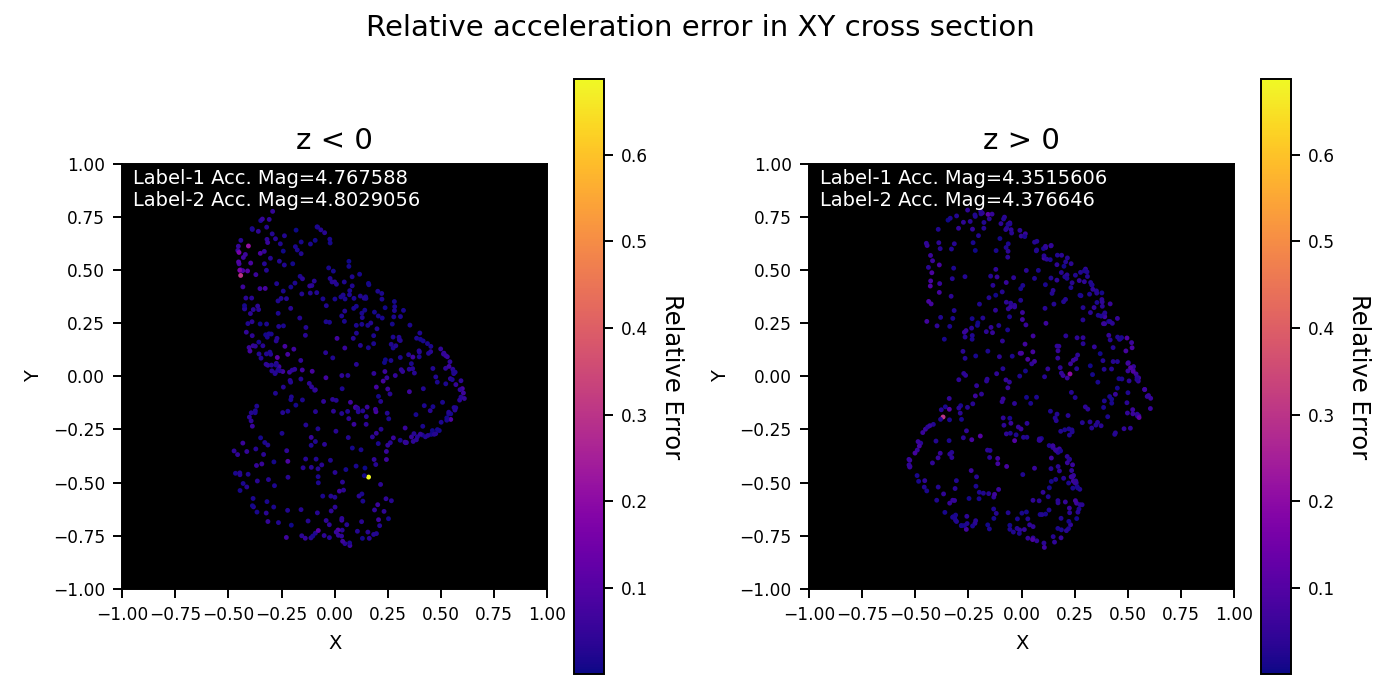

(<AxesSubplot: title={'center': 'z > 0'}, xlabel='X', ylabel='Y'>,
 tensor([[-1.4894,  2.4524, -1.0393],
         [ 1.5207, -0.8261, -1.8128],
         [ 0.7287, -0.9828, -2.7429],
         ...,
         [-1.0306,  1.3363, -2.3278],
         [ 2.6204, -0.3058, -0.9783],
         [ 2.0286,  2.3448, -1.2959]]))

In [13]:
gravann.polyhedral.plot_compare_acceleration(SAMPLE_NAME,
                                             compare_mode=('model', 'polyhedral'),
                                             model_1=(mascon_model, encoding, mascon_c),
                                             plane="XY",
                                             N=NUMBER_OF_POINTS_FOR_COMPARISON,
                                             logscale=False,
                                             altitude=1e-5)

In [14]:
mascon_model2polyhedral_gt = gravann.validation_v2(mascon_model, encoding, SAMPLE_NAME, 'polyhedral', use_acc=True,
                mesh_vertices=mesh_vertices,
                mesh_faces=mesh_faces,
                N=NUMBER_OF_POINTS_FOR_VALIDATION,
                N_integration=N_QUADRATUR,
                batch_size=BATCH_SIZE,
                progressbar=True)

Computing validation...:  65%|████████████████████████████████▍                 | 55000/84894 [02:26<01:06, 447.16it/s]

Discarding 2987 of 18294 points in altitude sampler which did not meet requested altitude.


Computing validation...:  77%|██████████████████████████████████████▎           | 65000/84894 [03:15<00:56, 349.41it/s]

Discarding 8598 of 18294 points in altitude sampler which did not meet requested altitude.


Computing validation...:  88%|████████████████████████████████████████████▏     | 75000/84894 [03:59<00:29, 335.51it/s]

Discarding 15222 of 18294 points in altitude sampler which did not meet requested altitude.


Computing validation...: 85000it [04:35, 308.38it/s]                                                                   


In [15]:
mascon_model2polyhedral_gt

,Altitude,Normalized L1 Loss,Normalized Relative Component Loss,RMSE,relRMSE
0,Low Altitude,0.035211,0.037513,0.222524,0.083531
1,High Altitude,0.031746,0.040999,0.498353,0.197271
2,Altitude_0,0.010305,0.011935,0.036322,0.013993
3,Altitude_1,0.004355,0.005804,0.016137,0.007187
4,Altitude_2,0.002618,0.005329,0.023684,0.019373


## 6 - Comparing polyhedral trained NN & mascon trained NN

Discarding 0 of 18294 points in altitude sampler which did not meet requested altitude.
Splitting in left / right hemisphere
Left:  453  points.
Right:  547  points.


<IPython.core.display.Javascript object>


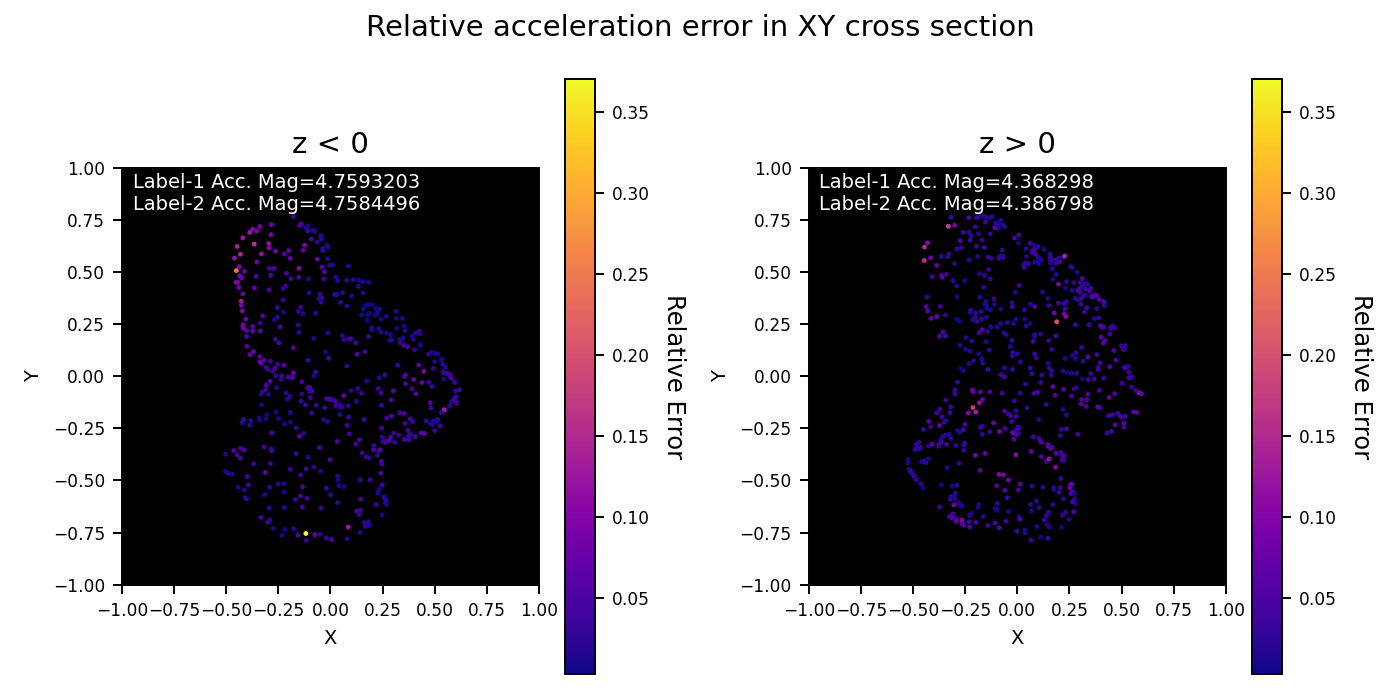

(<AxesSubplot: title={'center': 'z > 0'}, xlabel='X', ylabel='Y'>,
 tensor([[ 2.0158,  0.5498, -2.0985],
         [ 2.5687, -0.7664, -1.6949],
         [ 0.1437, -1.5187, -2.6818],
         ...,
         [ 2.7450, -0.1470, -0.9830],
         [-2.3611,  1.3894,  0.2427],
         [ 0.3815,  0.1729, -2.9832]]))

In [16]:
gravann.polyhedral.plot_compare_acceleration(SAMPLE_NAME,
                                             compare_mode=('model', 'model'),
                                             model_1=(mascon_model, encoding, mascon_c),
                                             model_2=(polyhedral_model, encoding, polyhedral_c),
                                             plane="XY",
                                             N=NUMBER_OF_POINTS_FOR_COMPARISON,
                                             logscale=False,
                                             altitude=1e-5)